# Exploratory Data Analysis 

In [1]:
# Importing Libraries
import pandas as pd
import ast 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df =  dataset['train'].to_pandas() # Converting to Pandas DataFrame 

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)


## Filter for Data Analyst roles in India

In [4]:
df_DA_India = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]

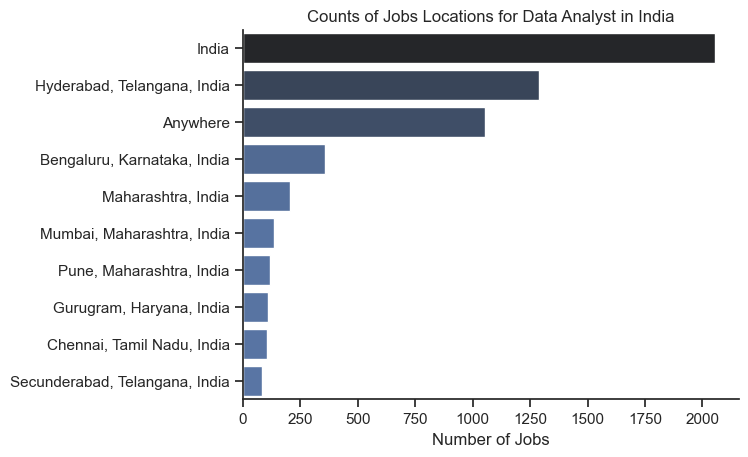

In [18]:
df_plot = df_DA_India['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine() # Remove the top and right spines
plt.title('Counts of Jobs Locations for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

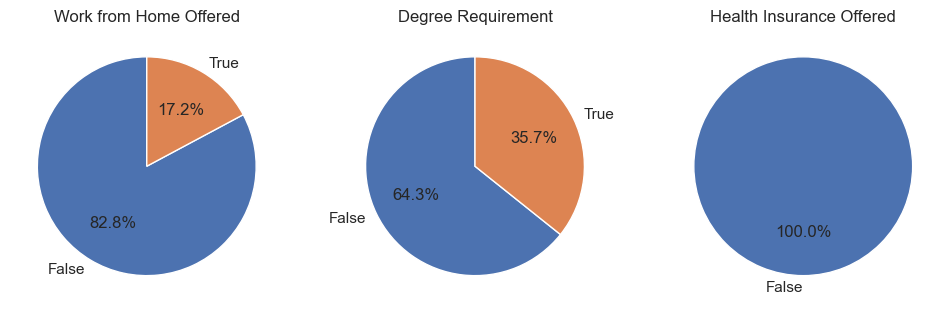

In [26]:
dict_column = {
    'job_work_from_home':'Work from Home Offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}
fig,ax = plt.subplots(1,3)
fig.set_size_inches((12,5)) 
for i, (column, title) in enumerate(dict_column.items()):
    # Get the counts
    value_counts = df_DA_India[column].value_counts()
    
    # Use the index as labels (e.g., True/False)
    labels = value_counts.index.astype(str)  # convert to string for labels

    # Plot pie chart
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)


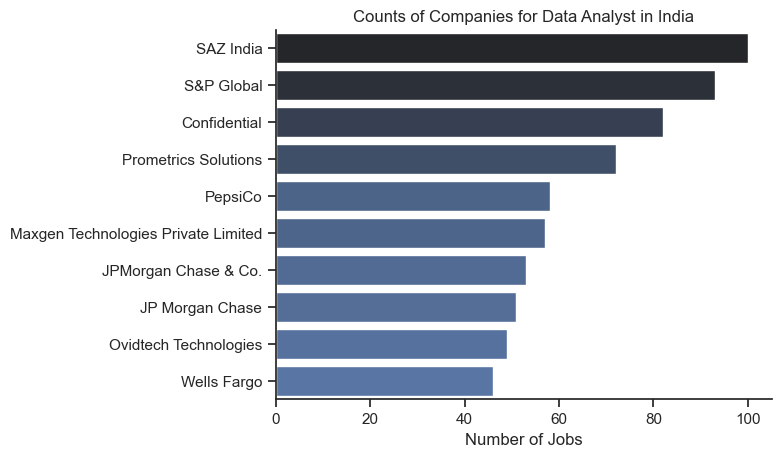

In [33]:
df_plot = df_DA_India['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine() # Remove the top and right spines
plt.title('Counts of Companies for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()